<a href="https://colab.research.google.com/github/katearb/ipynb-projects/blob/master/w2_Statisctics_HypothesisTesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework for statistics module

Rules for code style:
* All the code in this notebook
* Imports are provided in the head of the notebook
* All the cells could be ran in the right order from the top to the bottom
* Commentaries are required
* All the plots should have: title, axis labels and summaries (if necessary)
* Main summaries are provided in cells using markdown **(your analysis of the results and data is very important!!!)**
* Try to use functions and classes to reduce duplicated code blocks to minimum

Also you can use $\LaTeX$ to write formulas. F.e. $\bar{y} = \frac{1}{n}\sum_{i=1}^n \hat{x}_i$ or on a new line:
$$
    \bar{y} = \frac{1}{n}\sum_{i=1}^n \hat{x}_i
$$
To do so, you can write anything between $\$ \quad \$$ (or  $ \$\$ \quad\$\$ $).

### Criteria (50 points total):
* Task 1 (17 points)

    * Requested formulas are provided - 4 points
    * All necessary experiments are done - 6 points
    * Results are analysed with commentaries - 7 points
* Tasks 2.1 и 2.2 (16 points)

    * Visualization and/or simple exploratory data analysis are implemented - 2 points
    * Hypotheses are tested - 2 points
    * Results are analysed with commentaries - 4 points
* Task 3 (13 points)

    * Visualization and/or simple exploratory data analysis are implemented - 2 points
    * Hypotheses are tested - 4 points
    * Data was aggregated properly - 2 points
    * Results are analysed with commentaries - 5 points
* Extra points:

    * 4 points in case clear, "pythonic" and understandable code style.

Good work: 40+ points.

Result: 47/50

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as st
import math

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

import seaborn as sns
plt.style.use('bmh')

from pylab import rcParams

from numpy.random import seed, randn
seed(1)

# plots in svg look more precise
%config InlineBackend.figure_format = 'svg'

# Task 1

## Stratification

The example:

Let's assume, we need to estimate a mean votes count for every election candidate. Suppose there are 3 cities in a country: 1 million factory workers live in city A, 2 million office workers live in city B, and 3 million senior citizens live in city B. We can choose a random sample of 60 votes from the entire population, but there is some chance that the random sample will be poorly balanced between these cities and, therefore, will be biased and of little use ("average temperature in the hospital"), causing a significant error in the estimation. Instead, if we choose to use a simple random sample of 10, 20 and 30 votes from cities A, B and C, respectively, we can get a smaller error in the estimate with the same total sample size. This technique is called stratification.


### The task

Suppose the population is a mixture of 3 normally distributed CBs. In other words, the population can be divided into 3 strata.
$$
    F(X) = a_1 F(X_1) + a_2 F(X_2) + a_3 F(X_3)
$$

**Goals:**  

1. Derive (for example, in the block below, using Markdown) the formulas for point estimates of the mathematical expectation and variance for the average value of subsamples formed in different ways:
- random selection from the entire population;
- random selection of strata in proportion to strata volumes;
- random selection according to the optimal sub-sampling.

2. Calculate point estimates of the mathematical expectation and variance of the mean value for each data sampling method from p.1, provided:
* Experiments should be conducted for 3 cases (for every method from p.1 each):
     * all strata have the same mat. expectations and variance;
     * strata have different mat. expectations, but the same variance;
     * strata have different mat. expectations and variance.
* For each sampling method plot histogram of General Population data (using matplotlib or seaborn packages);
* Plot boxplots for sample mean estimated using each sampling method on a single figure to compare the results. Repeat for each experiment.
* You are provided with `GeneralPopulation` class. It already has all necessary methods for sampling and creating general population as a mixture of strata.
* Your goal is to write functions to conduct experiments and visualize the results.   
* Also provide commentaries as summaries and analysis of results after each visualization.


## Solution for Task 1

### Formulas:

#### Stratified sample point estimations:


Subsample $= (X_{1k}, ..., X_{n_{k}k}), k = \bar{1, L}$

$\mu_k - $ subsample mathematical expectation

$\mu_s - $ sample mathematical expectation, s = {a1, a2, a3}

$\bar{X}_{s} - $ sample  mean

$\bar{X} - $ subsample  mean

$ D - $ subsample variance

$$\mu_s = \sum_{k=1}^L a_k \mu_k = \sum_{k=1}^L a_k E\bar{X}_k = \sum_{k=1}^L a_k E(\frac{1}{n_k}\sum_{m=1}^{n_k}X_{mk})$$

$$ \mu_k =  E\bar{X} = E(\frac{1}{L}\sum_{m=1}^{L}X_{ik})$$

$$
D = \sum_{k=1}^La_k^2D(\bar{X_k}) = \sum_{k=1}^La_k^2 \frac{\sigma_k^2}{n_k}
$$




#### Sample volumes if they are sampled proportionally:

$$
 \mu_s = \sum_{k=1}^L a_k \mu_k = \sum_{k=1}^L a_k E\bar{X}_k = \sum_{k=1}^L a_k E(\frac{1}{n_k}\sum_{m=1}^{n_k}X_{mk})
$$

$$
n_k = na_k; k = 1, L;
$$

$$
\mu_k = E(\frac{1}{na_k}\sum_{m=1}^{na_k}X_{mk})
$$

$$
D = \sum_{k=1}^La_k^2D(\bar{X_k}) = \sum_{k=1}^La_k^2 \frac{\sigma_k^2}{na_k}
$$

#### Sample volumes if they are optimal sampled (Neyman's method):



$$
 \mu_s = \sum_{k=1}^L a_k \mu_k = \sum_{k=1}^L a_k E\bar{X}_k = \sum_{k=1}^L a_k E(\frac{1}{n_k}\sum_{m=1}^{n_k}X_{mk})
$$

$$
n_k = n \frac{a_k\sigma_k}{\sum_{k=1}^La_k\sigma_k}; k = 1, L; n = \sum_{i=1}^Ln_i
$$

$$
\mu_k =  E(\frac{1}{n \frac{a_k\sigma_k}{\sum_{k=1}^La_k\sigma_k}}\sum_{m=1}^{n \frac{a_k\sigma_k}{\sum_{k=1}^La_k\sigma_k}}X_{ik}) = E(\frac{\sum_{k=1}^La_k\sigma_k}{na_k\sigma_k}\sum_{m=1}^{n \frac{a_k\sigma_k}{\sum_{k=1}^La_k\sigma_k}}X_{mk}) 
$$

$$
D = \sum_{k=1}^La_k^2D(\bar{X_k}) = \sum_{k=1}^La_k^2 \frac{\sigma_k^2}{n_k} = \sum_{k=1}^La_k^2 \frac{\sigma_k^2}{n \frac{a_k\sigma_k}{\sum_{k=1}^La_k\sigma_k}} = \sum_{k=1}^La_k \frac{\sigma_k}{n \frac{1}{\sum_{k=1}^La_k\sigma_k}}
$$


**GeneralPopulation class**  
Already has methods for creating general population as a mixture of strata, for generating subsample with random, optimal and stratified techniques:

In [ ]:
class GeneralPopulation:

  def __init__(self, 
               means: [float], 
               stds: [float], 
               sizes: [int], 
               random_state: int = 15
               ):
    """
    Initializes our General Population and saves the given distributions
    
    :param means: List of expectations for normal distributions
    :param stds: List of standard deviations for normal distributions
    :param sizes: How many objects will be in each strata
    :param random_state: Parameter fixing randomness. Needed so that when conducting
    experiment repeatedly with the same input parameters, the results remained the same
    """
    self.strats = [st.norm(mean, std) for mean, std in zip(means, stds)]
    self._sample(sizes)
    self.random_state = random_state

  def _sample(self, sizes):
        """Creates a general population sample as a mixture of strata
        
        :param sizes: List with sample sizes of the corresponding normal distributions
        """
        self.strats_samples = [rv.rvs(size) for rv, size in zip(self.strats, sizes)]
        self.general_samples = np.hstack(self.strats_samples)
        self.N = self.general_samples.shape[0]
        
        # number of strata
        self.count_strats = len(sizes)
        
        # ratios for every strata in GP
        self.ws = [size/self.N for size in sizes]
        
        # ME and Std for GP
        self.m = np.mean(self.general_samples)
        self.sigma = np.std(self.general_samples)
        
        # ME and std for all strata
        self.ms = [np.mean(strat_sample) for strat_sample in self.strats_samples]
        self.sigmas = [np.std(strat_sample) for strat_sample in self.strats_samples]

  def random_subsampling(self, size):
      """Creates a random subset of the entire population
      
      :param sizes: subsample size
      """
      rc = np.random.choice(self.general_samples, size=size) 
      return rc
      
  def proportional_subsampling(self, size):
      """Creates a subsample with the number of elements, proportional shares of strata
      
      :param sizes: subsample size
      """
      self.strats_size_proport = [int(np.floor(size*w)) for w in self.ws]
      
      rc = []
      for k in range(len(self.strats_size_proport)):
          rc.append(np.random.choice(self.strats_samples[k],
                                      size=self.strats_size_proport[k]))
      
      return rc
      
  def optimal_subsampling(self, size):
      """Creates a subsample with the optimal number of elements relative to strata
      
      :param sizes: subsample size
      """
      sum_denom = 0
      for k in range(self.count_strats):
          sum_denom += self.ws[k] * self.sigmas[k]
      
      self.strats_size_optimal = [int(np.floor((size*w*sigma)/sum_denom)) for w, sigma in zip(self.ws, self.sigmas)]
      if 0 in self.strats_size_optimal:
          raise ValueError('Strats size is 0, please change variance of smallest strat!')
      
      rc = []
      for k in range(len(self.strats_size_optimal)):
          rc.append(np.random.choice(self.strats_samples[k],
                                      size=self.strats_size_optimal[k]))
      
      return rc   

  def run_experiments(self, n_sub, subsampling_method, n_experiments=1000):
      """Conducts a series of experiments and saves the results
      
      :param subsampling_method: method for creating a subsample
      :param n_experiments: number of experiment starts
      """
      means_s = []
      
      if(len(self.general_samples)<100):
          n_sub = 20
      
      if(subsampling_method == 'random_subsampling'):
          for n in range(n_experiments):
              rc = self.random_subsampling(n_sub)
              
              mean = rc.sum()/len(rc)
              means_s.append(mean)
              
      else:
          for n in range(n_experiments):
              if(subsampling_method == 'proportional_subsampling'):
                  rc = self.proportional_subsampling(n_sub)
              elif(subsampling_method == 'optimal_subsampling'):
                  rc = self.optimal_subsampling(n_sub)
              
              strats_mean = []
      
              for k in range(len(rc)):
                  strats_mean.append(sum(rc[k])/len(rc[k]))
      
              # Mean for a mixture
              means_s.append(sum([w_k*mean_k for w_k, mean_k in zip(self.ws, strats_mean)]))
              
      return means_s

In [ ]:
"""HERE IS YOUR CODE
It should be implemented as follows:
* Takes a GeneralPopulation class instance;
* Uses matplotlib or seaborn packages to plot distribution for general population;
* Don't forget a title, grid etc. 
"""

def create_histplot_general_population(population: GeneralPopulation):
  plt.figure(figsize=(6, 3))

  sns.histplot(population.general_samples, kde=True)

  plt.title(f'Distribution of General Population')
  plt.ylabel('count')
  plt.xlabel('values')
  plt.show()

  return
  
def create_histplot(population: GeneralPopulation, 
                    sampling_methods: list = ['random_subsampling', 
                                              'proportional_subsampling', 
                                              'optimal_subsampling'],
                    add_gp: bool=False):
  fg = plt.figure(figsize=(20, 3))
  gs = fg.add_gridspec(1, 3)

  for i, method in enumerate(sampling_methods):
    fg.add_subplot(gs[:, i])
    subsample = population.run_experiments(N_SUBSAMPLE, method)
    sns.histplot(subsample, kde=True)

    plt.title(f'Distribution of {method} method')
    plt.ylabel('count')
    plt.xlabel('values')
  plt.show()

  if add_gp:
    create_histplot_general_population(population)

  return


Function for plotting Boxplots for sample mean:

In [ ]:
"""HERE IS YOUR CODE
It should be implemented as follows:
* Takes a GeneralPopulation class instance;
* Runs method `run_experiments` for each sampling method and gets vector of mean values;
* Uses matplotlib or seaborn packages to plot boxplots of mean values for each subsampling techniques;
* Axis Y == Mean values; Axis X == subsampling methods;
* Don't forget a title, grid etc. 
"""

def create_boxplot(population: GeneralPopulation,
                   sampling_methods: list = ['random_subsampling',
                                             'proportional_subsampling', 
                                             'optimal_subsampling'],
                   add_gp: bool= False):
  plt.figure(figsize=(6, 9))
  
  subsamples = [population.run_experiments(N_SUBSAMPLE, method) for method in sampling_methods]
  
  if add_gp:
      subsamples.append(population.general_samples)
      columns = sampling_methods.copy() + ['General Population']
  else:
      columns = sampling_methods.copy()

  data = pd.DataFrame(subsamples).T
  data.columns = columns

  sns.boxplot(data=data, orient='v', palette="Set2")
  plt.ylabel('values')
  plt.title('Distribution of 3 sampling methods and General Population')
  plt.xticks(rotation=15)
  plt.show()

  return

**Parameters for each General Population**  
You can use these or specify your own parameters for strata:

In [ ]:
SIZES = (150, 150, 150)
N_SUBSAMPLE = 150
EQUAL_MEAN_EQUAL_STDS_ARGS = {'means': [0, 0, 0], 'stds': [3, 3, 3], 'sizes': SIZES}
DIFFERENT_MEAN_EQUAL_STDS_ARGS = {'means': [15, -1, -17], 'stds': [3, 3, 3], 'sizes':SIZES}
DIFFERENT_MEAN_DIFFERENT_STDS_ARGS = {'means': [15, -1, -17], 'stds': [3, 7, 11], 'sizes':SIZES} # changed means parameters according to the task

**Initialization**

In [ ]:
# Create GeneralPopulation class instances here
population_equal_mean_stds = GeneralPopulation(**EQUAL_MEAN_EQUAL_STDS_ARGS)
population_diff_mean_equal_stds = GeneralPopulation(**DIFFERENT_MEAN_EQUAL_STDS_ARGS)
population_diff_mean_stds = GeneralPopulation(**DIFFERENT_MEAN_DIFFERENT_STDS_ARGS)

**General population with EQUAL means and EQUAL STDs of strata**  
Distribution histogram:

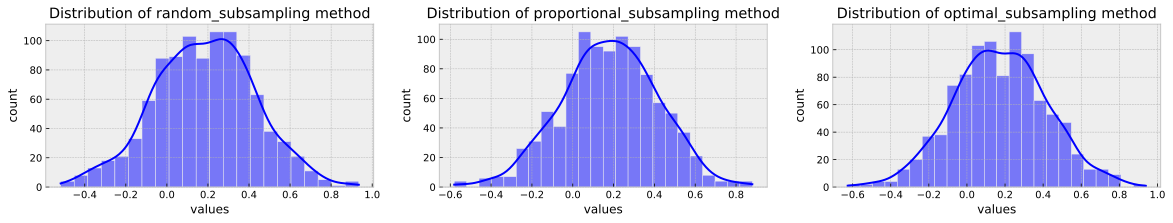

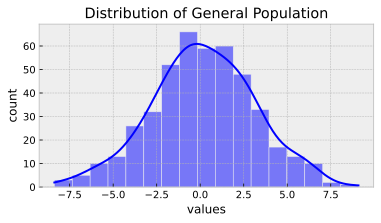

In [ ]:
# Run plotting for density
create_histplot(population_equal_mean_stds, add_gp=True)

Boxplots for sample mean:

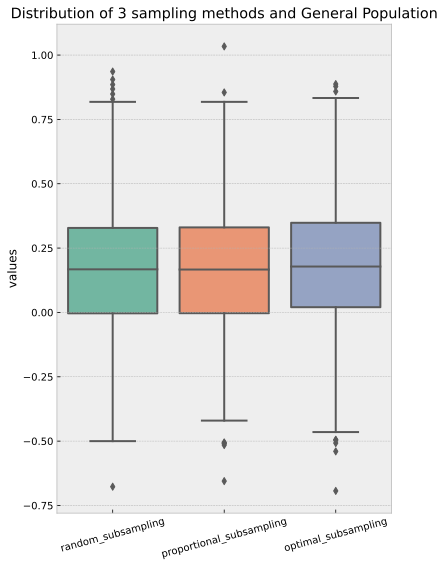

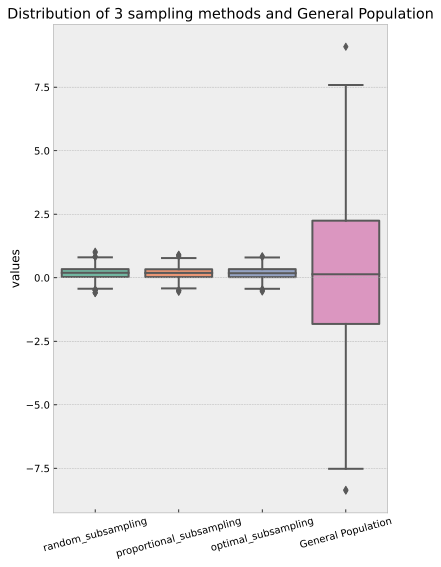

In [ ]:
# Run plotting for boxplots
create_boxplot(population_equal_mean_stds)
create_boxplot(population_equal_mean_stds, add_gp=True)

### Observations:
* On the boxplots, the boxes are similar among 3 methods, i.e. IQRs are equal for all subsamples.
* The whiskers are also on the same levels. This means that the value ranges are similar.
* Medians of all 3 subsamples are very close to General Population's median. The strongest displacement is shown by random subsample, but it is not critical.
* On the histplot, proportional method's distribution is the closest to normal one. Meanwhile, random subsample is positive skewed, optimal subsample -- negative skewed.

**General population with DIFFERENT means and EQUAL STDs of strata**  
Distribution histogram:

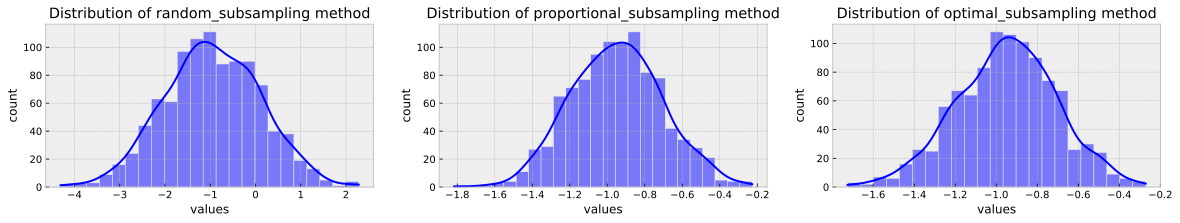

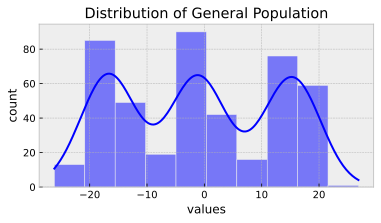

In [ ]:
# Run plotting for density
create_histplot(population_diff_mean_equal_stds, add_gp=True)

Boxplots for sample mean:

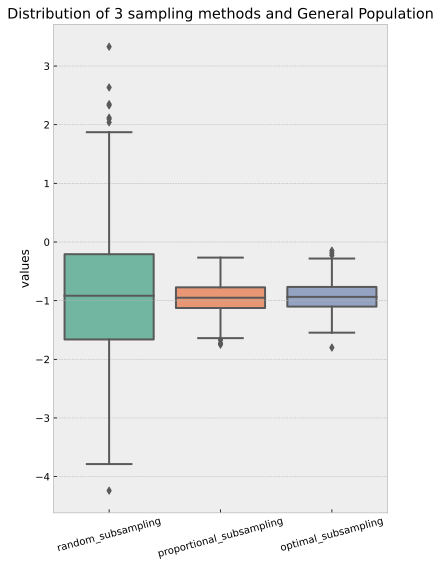

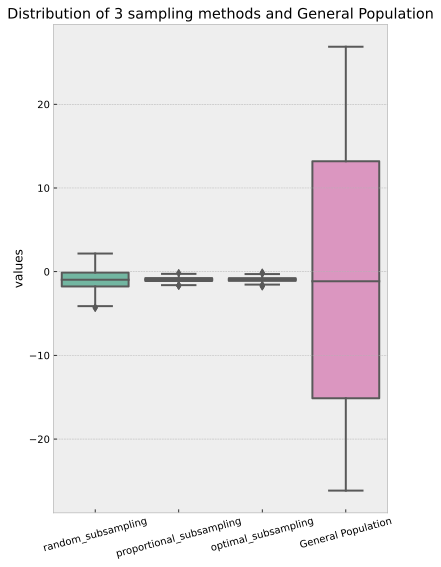

In [ ]:
# Run plotting for boxplots
create_boxplot(population_diff_mean_equal_stds)
create_boxplot(population_diff_mean_equal_stds, add_gp=True)

### Observations:
* IQR of random sample increased compared to the previous experiment. At the same time, IQR of proportional and optimal methods decreased and still are the same.Now the difference between their IQR are clearly observed and we can make some conclusions about estimation for given methods.
* Same nores are fair for the ranges. Obviously, the rande of random sample is much wider compared to two other methods.
* The medians of subsamples are still very close to General Population's median.
* The distplot of General Population differs from the one from  the first experiment and is unlike to distplots of subsamples.
General Population distriution has 3 modes, while subsamples' distributions has 1 mode each and are close to normal distribution.

**General population with DIFFERENT means and DIFFERENT STDs of strata**  
Distribution histogram:

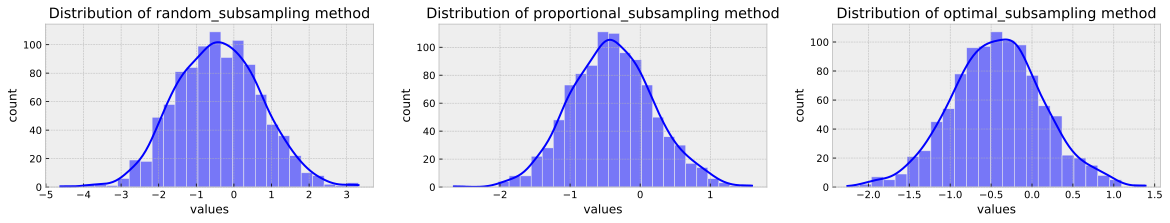

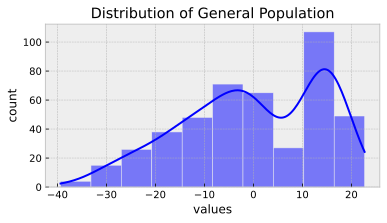

In [ ]:
# Run plotting for density
create_histplot(population_diff_mean_stds, add_gp=True)

Boxplots for sample mean:

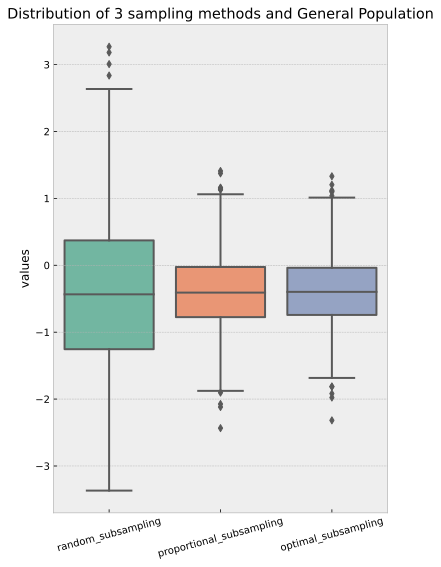

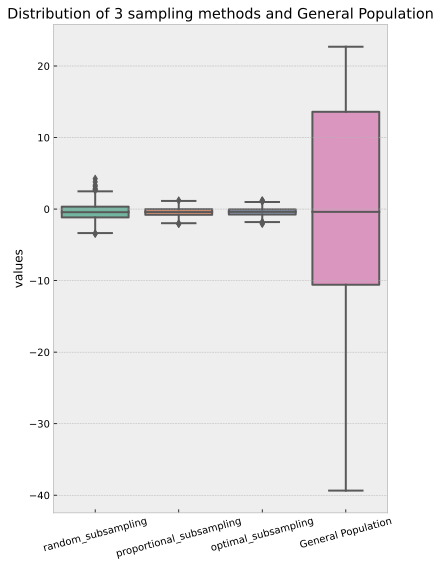

In [ ]:
# Run plotting for boxplots
create_boxplot(population_diff_mean_stds)
create_boxplot(population_diff_mean_stds, add_gp=True)

### Obseravations:
* The medians are still very similar to General Population.
* IQR for proportional subsample is a bit narrower than for random subsample.
* IQR for optimal subsample is a bit narrower than for random and proportional subsamples.
* The differences are more clear when we look at the whiskers: It's visually noticeable, that  proportional subsample has shorter whiskers (i.e. narrower values' range) than random subsample. Moreover, optimal subsample has even shorter whiskers than proportional one.
* On the distplot, distributions of subsamples are normal.
* General Population distribution has two modes and is positive skewed.

####With the experiments conducted and statistics estimated we can generate these <b>conclusions</b>: 
* The first experiment showed that there is no benefits from any kind of subsampling, while all strata have the same mat. expectations and variance. All distributions showed almost the same results.
* The second experiment showed that the range of mean estimations decreases when we use statified methods of subsampling: proportional and optimal. The random method showed much wider range of estimations.
* The third experiment showed that optimal method has the the narrowest range of estimation values.

####Overall results:
1. When the mean values are different and the variance values are similar for the stratas in the General Population, there is no preferable method for sampling.
2. When the mean values are different and the variance values are similar for the stratas in the General Population, the proportional method is prefered.
3. When both the mean values and the variance values are different for the stratas in the General Population, the optimal method is prefered.

# Task 2



### Part 1
Using [this criteria](https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/how-to/correlation/interpret-the-results/#:~:text=For%20the%20Pearson%20correlation%2C%20an,linear%20relationship%20between%20the%20variables.&text=If%20both%20variables%20tend%20to,represents%20the%20correlation%20slopes%20upward.), check whether there is a correlation between a brain size and intelligence for a dataset consisted both of men and women objects. Also check it for men and women subsamples separately.


### Part 2
Using $Chi^2$ criteria check whether there is a statistical difference between men's and women's choice of auto.  (Features `Sex` и `PreferCar`)


You can download dataset using the following:

In [ ]:
! pip install bds_courseware

In [ ]:
from bds_courseware import read_drive_dataset
from bds_courseware import HOMEWORK_DATASETS
brain_data = read_drive_dataset(*HOMEWORK_DATASETS['brain'])  # PART 1
cars_prefes_data = read_drive_dataset(*HOMEWORK_DATASETS['car_perfs'])  # PART 2

## Part 1
### Step 1: correlation between a brain size and intelligence for a dataset consisted both of men and women objects.

In [ ]:
def draw_significance(iq_columns: [str],
                      p_values: [float], 
                      method: str,
                      gender: str=''):
    plt.bar(x=iq_columns, height=p_values) 
    x1, y1 = [-0.5, 2.5], [0.05, 0.05]
    plt.plot(x1, y1, color='r')
    plt.text(-0.5, 0.0505, "alpha=0.05", fontsize=10, color='r')

    if gender:
      plt.title(f'significance for coefficients of {method} correlation\nbetween Brain Size and given features for {gender}')
    else:
      plt.title(f'significance for coefficients of {method} correlation\nbetween Brain Size and given features')
    plt.ylabel('values')
    plt.xlabel('features')
    plt.show()

def examine_significance(data: pd.DataFrame,
                         method: str,
                         alpha: float = 0.05,
                         iq_columns: list = ['FSIQ', 'VIQ', 'PIQ'], 
                         gender: str=''):
    p_values = []
    for iq in iq_columns:
        if method == 'pearson':
          p_value = round(st.pearsonr(data[iq], data['MRI_Count'])[1], 3)
        else:
          p_value = round(st.spearmanr(data[iq], data['MRI_Count'])[1], 3)

        p_values.append(p_value)
        print(f'{iq} <-> Brain Size correlation: p-value = {p_value}')

        if p_value > alpha:
            print('This correlation coefficient is NOT significant!\n')
        else:
          print('This correlation coefficient is significant\n')
    draw_significance(iq_columns, p_values, method, gender)
    return

In [ ]:
corr_data = brain_data[['FSIQ', 'VIQ', 'PIQ', 'MRI_Count']]
corr_data.head()

,FSIQ,VIQ,PIQ,MRI_Count
0,133,132,124,816932
1,140,150,124,1001121
2,139,123,150,1038437
3,133,129,128,965353
4,137,132,134,951545


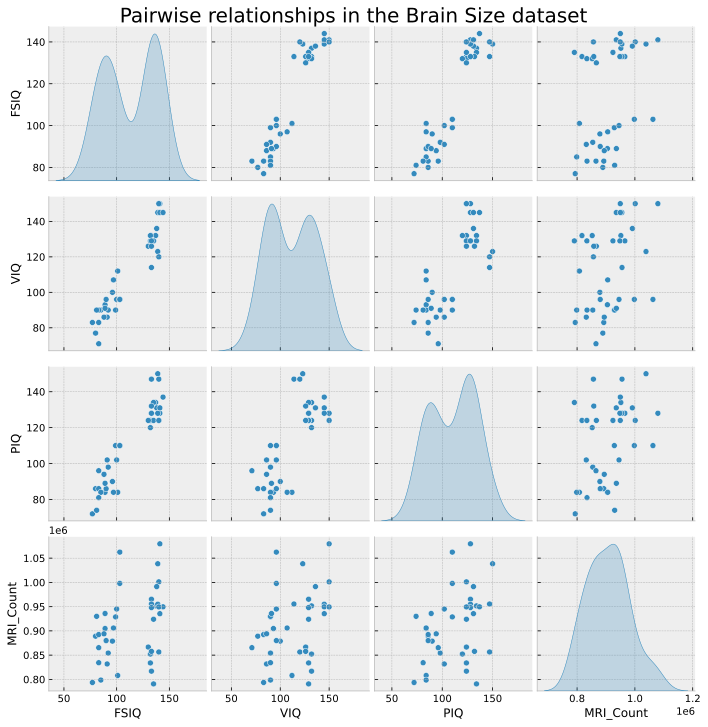

In [ ]:
g = sns.pairplot(corr_data, diag_kind='kde')
g.fig.suptitle("Pairwise relationships in the Brain Size dataset", y=1.01, size=20)
plt.show()

### The given IQ-data seems to tend to be near-normal distributed, but 2 modes are observed.  I suppose, it might be connected with male/female distinction (which I'm going to check in the next section). Brain-size data seems to be normal-like distributed.
### Moreover, there are groups of points to distinct clearly on some pair-plots (PIQ-FSIQ, PIQ-VIQ, FSIQ-VIQ, FSIQ-MRU_Count).  The intlegence measurements show positive correlation, which is not surprise.

####$ H_0 $ -- there is no correlation between brain size and IQ

####$ H_1 $ -- there is correlation between  brain size and IQ

####Here, IQ stands for any of the intellegence measurements given in the dataset, i.e FSIQ, VIQ or PIQ. The hypothesises are checking for each.

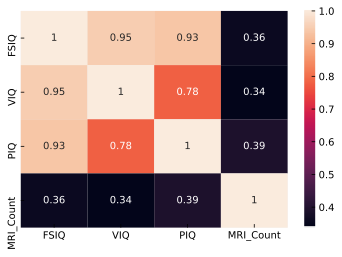

In [ ]:
# Step 1: Pearson correlation coefficients 
sns.heatmap(corr_data.corr(), annot=True)
plt.show()

#### A positive correlation between IQ and Brain size is observed. However, the strenght of the correlation is not great, and it varies in the range between 0.34 and 0.39 for different types of IQ measurements.

FSIQ <-> Brain Size correlation: p-value = 0.023
This correlation coefficient is significant

VIQ <-> Brain Size correlation: p-value = 0.033
This correlation coefficient is significant

PIQ <-> Brain Size correlation: p-value = 0.014
This correlation coefficient is significant



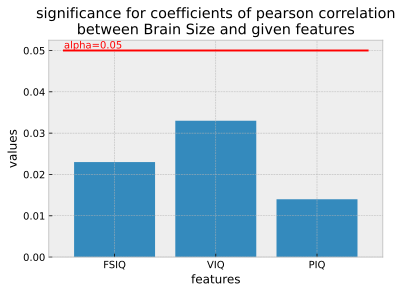

In [ ]:
# Step 2: Determine whether the correlation coefficient is significant
examine_significance(corr_data, 'pearson')

#### All kinds of IQ measurements showed significant correlation coefficients with Brain Size, by given alpha = 0.05.

#### We can reject the hull hypothesis.

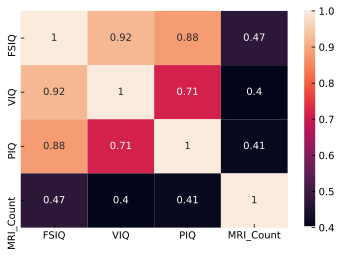

In [ ]:
# Step 3: Examine the monotonic relationship between variables (Spearman)
sns.heatmap(corr_data.corr(method='spearman'), annot=True)

#### A positive correlation between IQ and Brain size is observed. However, the strenght of the correlation is not great, and it varies in the range between 0.4 and 0.47 for different types of IQ measurements.

Spearman correlation
FSIQ <-> Brain Size correlation: p-value = 0.002
This correlation coefficient is significant

VIQ <-> Brain Size correlation: p-value = 0.011
This correlation coefficient is significant

PIQ <-> Brain Size correlation: p-value = 0.008
This correlation coefficient is significant



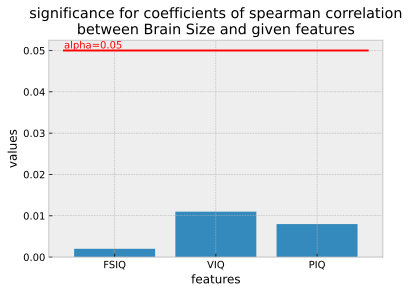

In [ ]:
# Determine whether the correlation coefficient is significant
print('Spearman correlation')
examine_significance(corr_data, 'spearman')

#### All kinds of IQ measurements showed significant correlation coefficients with Brain Size, by given alpha = 0.05.

### We can reject the hull hypothesis.

### Step 2: correlation between a brain size and intelligence for men and women separately.

####For male data:

####$ H_0 $ -- there is no correlation between brain size and IQ for men

####$ H_1 $ -- there is correlation between  brain size and IQ for men

####For female data:

####$ H_0 $ -- there is no correlation between brain size and IQ for women

####$ H_1 $ -- there is correlation between  brain size and IQ for women

####Here, IQ stands for any of the intellegence measurements given in the dataset, i.e FSIQ, VIQ or PIQ. The hypothesises are checking for each.


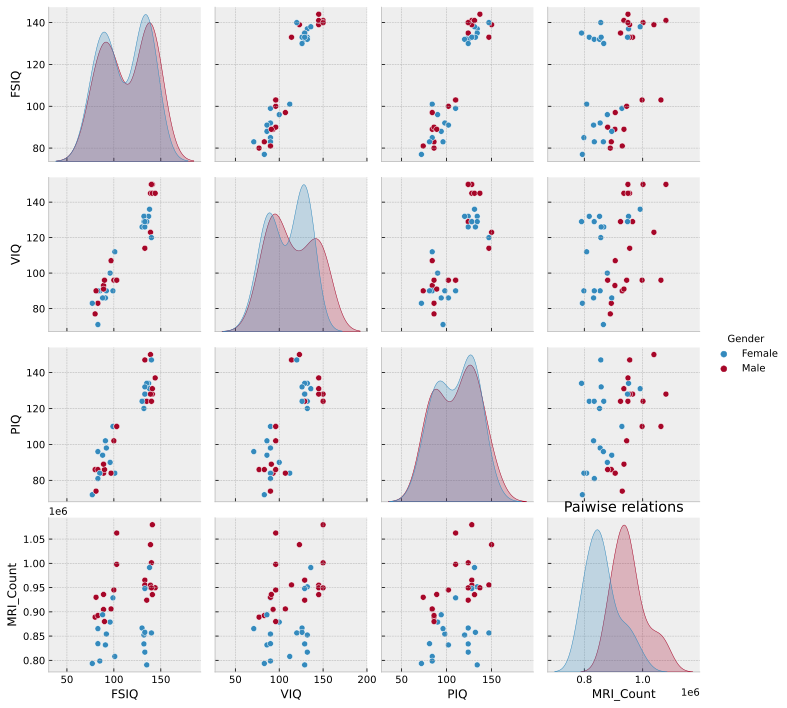

In [ ]:
gender_data = corr_data = brain_data[['Gender', 'FSIQ', 'VIQ', 'PIQ', 'MRI_Count']]
sns.pairplot(gender_data, diag_kind='kde', hue='Gender')
plt.title('Paiwise relations')
plt.show()

### My assumption about two modes was not confirmed :(
### Here, we can see that male brain is bigger in average than female's.
### On scatter plots, the difference is not so clear, but still we can se some tendencies for each gender.

In [ ]:
male = brain_data[brain_data['Gender'] == 'Male']
female = brain_data[brain_data['Gender'] == 'Female']

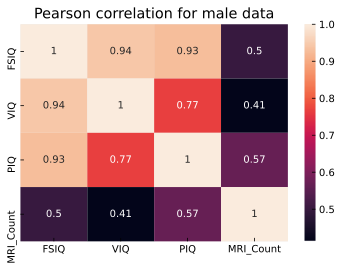

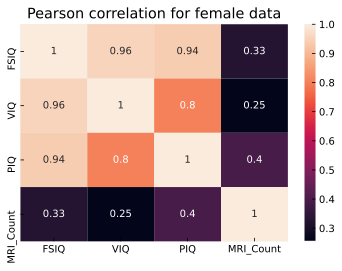

In [ ]:
# Step 1: Pearson correlation coefficients 
sns.heatmap(male.corr(), annot=True)
plt.title('Pearson correlation for male data')
plt.show()

sns.heatmap(female.corr(), annot=True)
plt.title('Pearson correlation for female data')
plt.show()

#### A positive correlation between IQ and Brain size is observed for both men and women. However, the strenght of the correlation is greater among men compared to women. It varies in the range between 0.41 and 0.57 for men and from 0.25 to 0.4 fo women.

-------------------------MALE------------------------
FSIQ <-> Brain Size correlation: p-value = 0.025
This correlation coefficient is significant

VIQ <-> Brain Size correlation: p-value = 0.07
This correlation coefficient is NOT significant!

PIQ <-> Brain Size correlation: p-value = 0.009
This correlation coefficient is significant



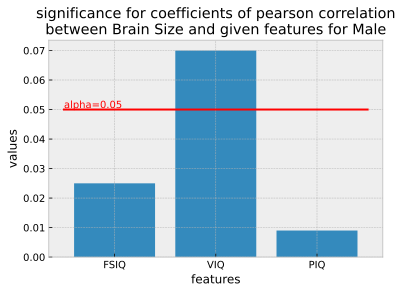

------------------------FEMALE------------------------
FSIQ <-> Brain Size correlation: p-value = 0.161
This correlation coefficient is NOT significant!

VIQ <-> Brain Size correlation: p-value = 0.278
This correlation coefficient is NOT significant!

PIQ <-> Brain Size correlation: p-value = 0.084
This correlation coefficient is NOT significant!



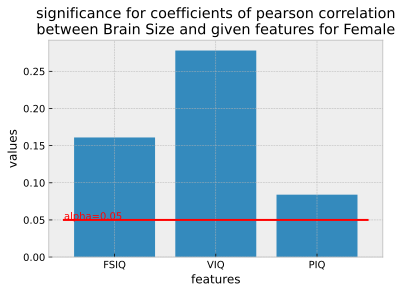

In [ ]:
# Step 2: Determine whether the correlation coefficient is significant
print('-------------------------MALE------------------------')
examine_significance(male, 'pearson', gender='Male')

print('------------------------FEMALE------------------------')
examine_significance(female, 'pearson', gender='Female')

#### Almost all correlation coefficients are NOT significant! In the male data, the correlations FSIQ <-> Brain Size and PIQ <-> Brain Size are the only exceptions. For all other coefficients we are fail to reject null hypothesis.

#### For female, all correlation coefficients are not significant.

####We can reject the null hypothesis for FSIQ and PIQ for male.

####We cannot reject the null hypothesis for VIQ for male.

####We cannot reject the null hypothesis for FSIQ, VIQ and PIQ for female.

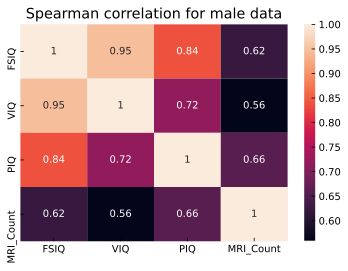

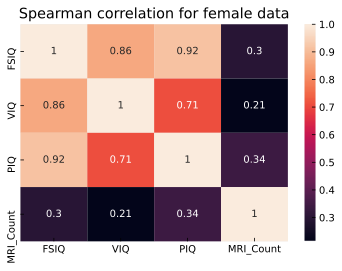

In [ ]:
# Step 3: Examine the monotonic relationship between variables (Spearman)
sns.heatmap(male.corr(method='spearman'), annot=True)
plt.title('Spearman correlation for male data')
plt.show()

sns.heatmap(female.corr(method='spearman'), annot=True)
plt.title('Spearman correlation for female data')
plt.show()

----------------------male----------------------
FSIQ <-> Brain Size correlation: p-value = 0.003
This correlation coefficient is significant

VIQ <-> Brain Size correlation: p-value = 0.011
This correlation coefficient is significant

PIQ <-> Brain Size correlation: p-value = 0.002
This correlation coefficient is significant



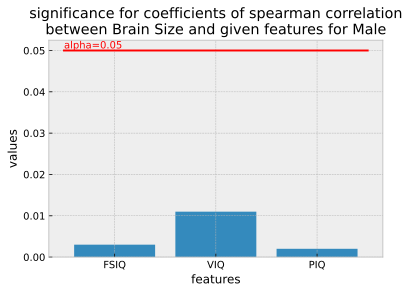

---------------------female---------------------
FSIQ <-> Brain Size correlation: p-value = 0.2
This correlation coefficient is NOT significant!

VIQ <-> Brain Size correlation: p-value = 0.366
This correlation coefficient is NOT significant!

PIQ <-> Brain Size correlation: p-value = 0.145
This correlation coefficient is NOT significant!



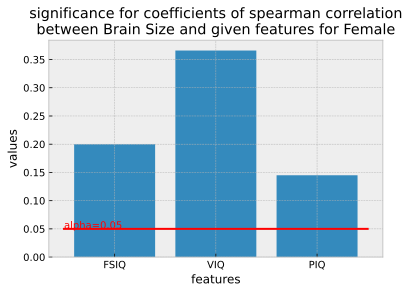

In [ ]:
# Determine whether the correlation coefficient is significant
print('----------------------male----------------------')
examine_significance(male, 'spearman', gender='Male')

print('---------------------female---------------------')
examine_significance(female, 'spearman', gender='Female')

#### All kinds of IQ measurements showed significant correlation coefficients with Brain Size for male, by given alpha = 0.05. In opposite, no correlations are significant for female.

### We can reject the hull hypothesis for male.
### We cannot reject the null hypothesis for female.

### Conclusion to part 1:
####1. There is a correlation between a brain size and intelligence for a dataset consisted both of men and women objects. The correlation is not great, but statistical significant.
####2. For men subsample, Pearson correlation between brain size and VIQ is not significant. All other correlation coefficients were estimated as significant.
####3. For female, non of the correlation coefficients are significant. We cannot assume, that the women's brain size and intellegent measurements are in linear relations.

## Part 2
####Using  Chi2  criteria check whether there is a statistical difference between men's and women's choice of auto. (Features Sex и PreferCar)

####$ H_0 $ -- there is a statistical difference between men's and women's choice of auto.

####$ H_1 $ -- there is not a statistical difference between men's and women's choice of auto.

In [ ]:
cars_prefes_data.head()

,ID,Age,Sex,LicYr,LicMth,ActCar,Kids5,Kids6,PreferCar,Car15K,Reason,Cost,Reliable,Perform,Fuel,Safety,AC/PS,Park,Room,Doors,Prestige,Colour
0,110,18,2,0,2,3,2,2,2,2,1,3,4,3,3,3,3,3,3,3,3,2
1,111,25,1,8,0,1,2,2,1,1,1,4,4,4,4,4,3,4,4,2,3,3
2,112,63,2,46,0,3,2,2,3,2,5,3,3,3,3,3,3,3,3,3,3,3
3,113,51,1,35,0,3,2,2,2,2,1,2,3,3,3,4,3,3,3,3,1,3
4,114,19,1,2,0,2,2,2,2,1,6,3,3,4,3,3,2,3,3,2,3,3


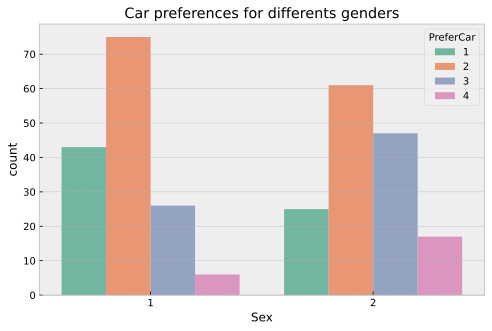

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x ='Sex', hue = "PreferCar", data = cars_prefes_data, palette = "Set2")
plt.title('Car preferences for differents genders')
plt.show( )

#### Generally, the proportions of bars are different gor male and female samples.
####The biggest difference is shown between the car types number 1 and number 2: the former are more popular among the gender encoded with number 1, while the later is more prefed by the gender number 2.

In [ ]:
chi2_data = pd.crosstab(cars_prefes_data['Sex'], cars_prefes_data['PreferCar'])

In [ ]:
# If the statistic is less than or equal to the critical value, we can fail to reject this assumption, otherwise it can be rejected.
stat, p, dof, expctd = st.chi2_contingency(chi2_data) 

alpha = 0.05
print('p-value:', round(p, 5))
if p <= alpha:
	print('reject H0')
else:
	print('fail to reject H0')

p-value: 0.00056
reject H0


### Conclusion for Part 2: 
###Statistical difference between men's and women's choice of auto was observed. The p-value is much less than alpga boarder. We reject the hypothesis that there are differences between men's and women's choice of auto.

# Task 3

You can find and download a dataset there:
https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016


1) For any country (you are free to choose any of the presented) 
 *  Visualize a feature **suicides_no** considering other features: **sex**, **age** (or **generation**) and year;
 *  Check whether there is statistical difference for suicide number between these groups: men / women. If it is found, can we claim that people of certain sex are more prone to suicides or do we need additional information?

2) For 2016: divide countries into 3-4 groups according to the values of the **gdp_per_capita** feature (use statistical characteristics to determine how to divide the data into groups), check if the suicides / 100k pop indicator differs in these groups. Do not forget that for each country you have several values and they need to be aggregated or checked for each group separately.

In [ ]:
def check_normality(data: pd.core.series.Series,
                    title: str):
    result = st.anderson(data)
    print('Statistic: %.3f' % result.statistic)

    for i in range(len(result.critical_values)):
      sl, cv = result.significance_level[i], result.critical_values[i]
      if result.statistic < result.critical_values[i]:
        print('+++%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
      else:
        print('---%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))
      
    plt.figure(figsize=(4, 3))
    sns.displot(data, kde=True)
    plt.title(f'Distribution of {title}')
    plt.show()

    return

In [ ]:
suicide_data = pd.read_csv(r'https://raw.githubusercontent.com/katearb/files/main/suicide_data.csv')

In [ ]:
suicide_data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


## Part 1

In [ ]:
suicide_us = suicide_data[suicide_data['country'] == 'United States']

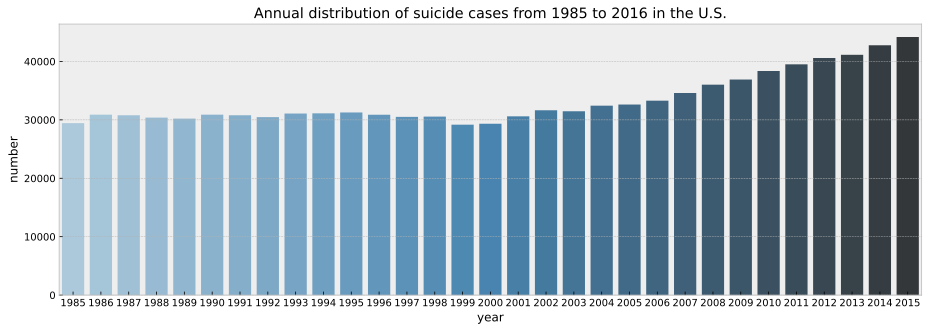

In [ ]:
plt.figure(figsize=(15.5, 5))
suicide_year = pd.crosstab(suicide_us['sex'], suicide_us['year'], 
                           aggfunc=sum, values=suicide_us['suicides_no']).sum()

sns.barplot(x=suicide_year.index, y=suicide_year, palette="Blues_d")
plt.title('Annual distribution of suicide cases from 1985 to 2016 in the U.S.')
plt.ylabel('number')
plt.show()

####From the 1980s to the year 2000, the level of suicide cases was near 30k per year. From 2001, we can observe a slight increade in numbers of suicides. The growth rate increases from 2006 and lasts till 2015. 

####The maximum  annual numbers of suicides (near 43k) were commited in 2015.
####The minimum was observed in 1999.

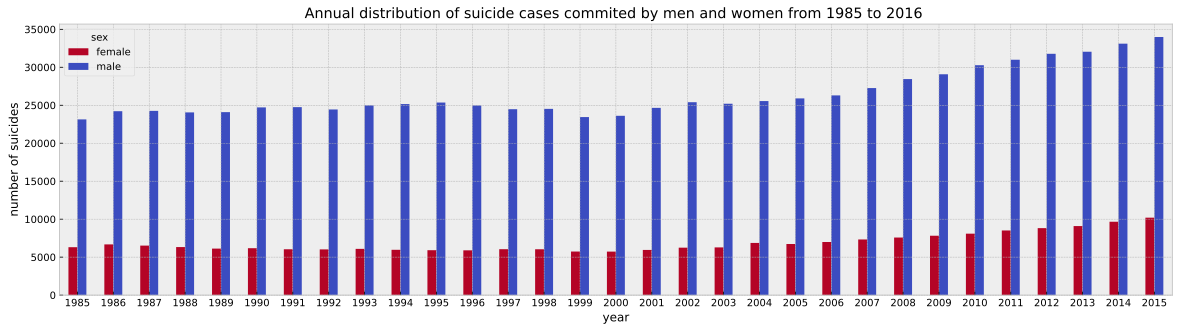

In [ ]:
suicide_year_sex = pd.crosstab(suicide_us['year'], suicide_us['sex'], 
                               aggfunc=sum, values=suicide_us['suicides_no'])
suicide_year_sex.plot(kind='bar', figsize=(19, 5), colormap='coolwarm_r', rot=0,
                      ylabel='number of suicides',
                      title = 'Annual distribution of suicide cases commited by men and women from 1985 to 2016 in the U.S.')
plt.show()

#### A dramatic gap in number of suicides commited annually by men and women is shown over the whole observed period.

#### The maximum by men = ~34k

#### The maxumum by women = ~ 10k, which is almost 4 times less compared to men.

#### The increase tendencies are similar for each sex and correspond together the common trend.

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


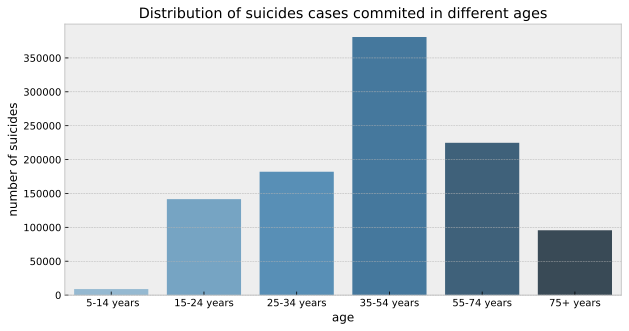

In [ ]:
plt.figure(figsize=(10, 5))
suicide_us.replace('5-14 years', ' 5-14 years', inplace=True)
suicide_age = pd.crosstab(suicide_us['year'], suicide_us['age'], 
                          aggfunc=sum, values=suicide_us['suicides_no']).sum()

sns.barplot(x=suicide_age.index, y=suicide_age, palette="Blues_d")
plt.title('Distribution of suicides cases commited in different ages')
plt.ylabel('number of suicides')
plt.show()

#### Middle aged people (35-54 years) are most likely to commit suicide compared to other age groups. The age group 55-74 years is on second place in terms of the number of suicides. Suicide is the least likely among young children (5-14 years).

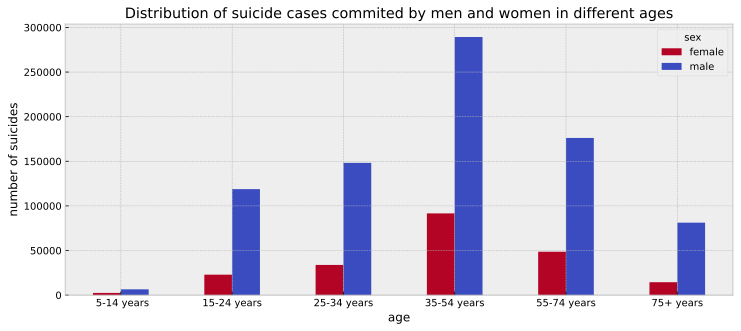

In [ ]:
suicide_year_sex = pd.crosstab(suicide_us['age'], 
                           suicide_us['sex'], aggfunc=sum, 
                           values=suicide_us['suicides_no'])
suicide_year_sex.plot(kind='bar', figsize=(12, 5), colormap='coolwarm_r', rot=0,
                      ylabel='number of suicides',
                      title = 'Distribution of suicide cases commited by men and women in different ages')
plt.show()

#### Just as in the graph with the distribution by year, here we see that women are much less likely to commit suicide, compared with men. The same trend of distribution of the number by age persists among both sexes.

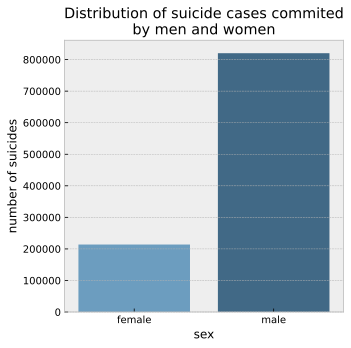

In [ ]:
plt.figure(figsize=(5, 5))
suicide_sex = pd.crosstab(suicide_us['year'], suicide_us['sex'], 
                          aggfunc=sum, values=suicide_us['suicides_no']).sum()

sns.barplot(x=suicide_sex.index, y=suicide_sex, palette="Blues_d")
plt.title('Distribution of suicide cases commited\nby men and women')
plt.ylabel('number of suicides')
plt.show()

#### The total number of suicides among men exceeds the same indicator among women by almost 4 times.

#### Despite the fact that the difference in the number of suicides among men and women is obvious, a test was conducted to prove the statistical significance.
#### Firstly, let's check normality of the distribution.

Statistic: 2.506
---15.000: 0.522, data does not look normal (reject H0)
---10.000: 0.595, data does not look normal (reject H0)
---5.000: 0.713, data does not look normal (reject H0)
---2.500: 0.832, data does not look normal (reject H0)
---1.000: 0.990, data does not look normal (reject H0)


<Figure size 288x216 with 0 Axes>

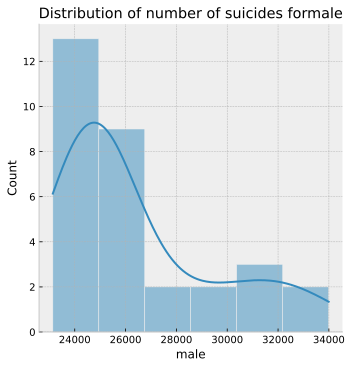

Statistic: 2.248
---15.000: 0.522, data does not look normal (reject H0)
---10.000: 0.595, data does not look normal (reject H0)
---5.000: 0.713, data does not look normal (reject H0)
---2.500: 0.832, data does not look normal (reject H0)
---1.000: 0.990, data does not look normal (reject H0)


<Figure size 288x216 with 0 Axes>

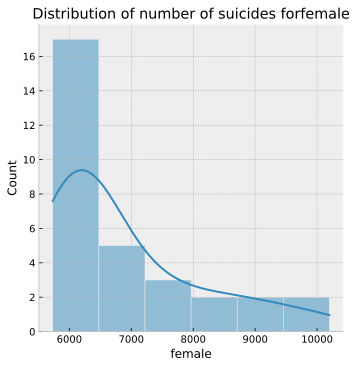

In [ ]:
suicide_crosstab = pd.crosstab(suicide_us['year'], suicide_us['sex'], aggfunc=sum, values=suicide_us['suicides_no'])

for s in ['male', 'female']:
  check_normality(suicide_crosstab[s], title=f'number of suicides for{s}')

#### The dustribution is not normal. Let's you Chi2 test.

#### $H_0$ -- There is no differnce  in the number of suicides among men and women.

#### $H_1$ -- There is differnce  in the number of suicides among men and women.

In [ ]:
# If the statistic is less than or equal to the critical value, we can fail to reject this assumption, otherwise it can be rejected.
chi2_data_car = pd.crosstab(suicide_data['sex'], suicide_data['suicides_no'])
stat, p, dof, expctd = st.chi2_contingency(chi2_data_car) 

prob = 0.95
critical = st.chi2.ppf(prob, dof)
if abs(stat) >= critical:
	print(f'{stat} >= {critical}\nThere is difference (reject H0).')
else:
	print(f'{stat} <= {critical}\nThere is no difference (fail to reject H0).')

3235.733938533065 >= 2190.291161486043
There is difference (reject H0).


### Conclusion.
####Overall, there is difference in the number of suicides among men and women, but still, I suppose, the correlation between sex and annual number of suicides can be determined not only by sex, as a physiological characteristic, but also by the third factors: economic, political, geographical, cultural, which often have different effects on people of different sexes.

## Part 2

#### For 2016: divide countries into 3-4 groups according to the values of the gdp_per_capita feature (use statistical characteristics to determine how to divide the data into groups), check if the suicides / 100k pop indicator differs in these groups. Do not forget that for each country you have several values and they need to be aggregated or checked for each group separately.

In [ ]:
def vusialize_groups(data: pd.DataFrame,
                     grouped_data: pd.core.groupby.generic.DataFrameGroupBy,
                     columns: list,
                     figsize: tuple=(7, 3)):
  
    for name, group in grouped_data:
        group = pd.crosstab(group[columns[0]], group[columns[1]], aggfunc=sum, 
                            values=data['suicides/100k pop']).sum()
        plt.figure(figsize=figsize)
        sns.barplot(x=group.index, y=group, palette="Blues_d")
        plt.ylabel('suicides/100k pop sum')
        plt.title(f'{name} group')
        plt.show()

    return

In [ ]:
data_2016 = suicide_data[suicide_data['year'] == 2016]

In [ ]:
data_2016.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
1248,Armenia,2016,male,75+ years,12,61956,19.37,Armenia2016,NaN,"10,546,135,160",3788,Silent
1249,Armenia,2016,male,55-74 years,16,237813,6.73,Armenia2016,NaN,"10,546,135,160",3788,Boomers
1250,Armenia,2016,male,35-54 years,16,350633,4.56,Armenia2016,NaN,"10,546,135,160",3788,Generation X
1251,Armenia,2016,male,15-24 years,5,202220,2.47,Armenia2016,NaN,"10,546,135,160",3788,Millenials
1252,Armenia,2016,female,75+ years,2,102414,1.95,Armenia2016,NaN,"10,546,135,160",3788,Silent


In [ ]:
# quantiles
gdp = data_2016['gdp_per_capita ($)'].unique()
Q1 = np.quantile(gdp, .25)
Q2 = np.quantile(gdp, .50)
Q3 = np.quantile(gdp, .75)

In [ ]:
# grouping
data_2016 = data_2016.assign(group=0)
data_2016.index = [i for i in range(len(data_2016))]

for row in range(len(data_2016)):
  gdp_per_capita = data_2016.loc[row, 'gdp_per_capita ($)']

  if gdp_per_capita < Q1:
    data_2016.loc[row, 'group'] = 1
  elif gdp_per_capita < Q2:
    data_2016.loc[row, 'group'] = 2
  elif gdp_per_capita < Q3:
    data_2016.loc[row, 'group'] = 3
  else:
    data_2016.loc[row, 'group'] = 4


In [ ]:
grouped_data = data_2016.groupby(by=['group'])

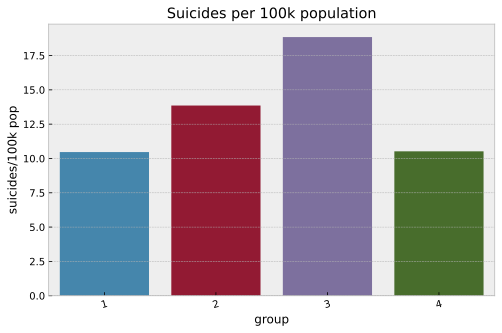

In [ ]:
# group visualization
plt.figure(figsize=(8, 5))
plt.xticks(rotation=15)
sns.barplot(x=data_2016['group'], y=data_2016['suicides/100k pop'], ci=None, dodge=False)
plt.title('Suicides per 100k population')
plt.show()

#### As we can see, the suicides/100k pop increase s with the growth of the gdp_per_capita from group 1 to group 3 (number of the group represents gdp_per_capita level: the bigger is number, the bigger is gdp_per_capita in these countries). However, group 4 breaks out of the trend and shows the lowest level of the lala indicator. Thus, the lowest suicides/100k numbers are observed with the maximum and minimum gdp_per_capita.

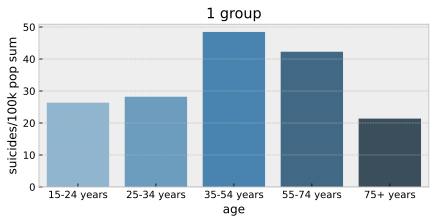

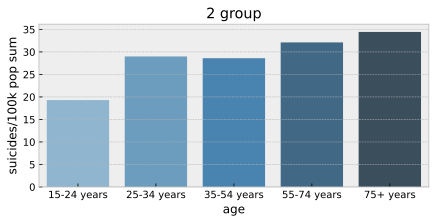

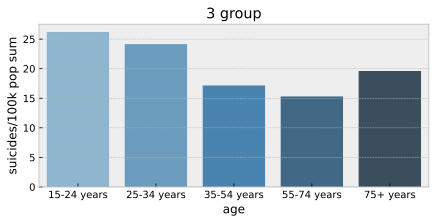

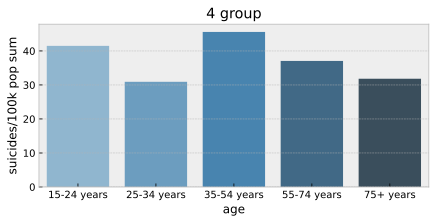

In [ ]:
#age visualization
vusialize_groups(suicide_data, grouped_data, ['year', 'age'])

#### The distribution for suicides/100k pop by age is different for each group. In the first group, the maximum number of suicides per 100k of the population is observed in the group of 35-54 years. Further down the descending 55-75, 25-34, 15-24 and 75+. In the second group, the suicides/100k pop increases with increasing age. In the third group, on the contrary, it decreases with the exception of the 75+ group. Here, the suicides/100k pop is the largest in group 3. There is no general trend in group 4. The highest number of suicides/100k pop is in the group of 35-54 years, and the lowest is in the group of 25-34.

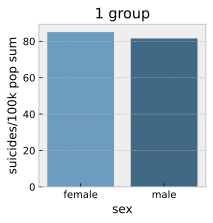

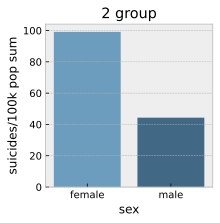

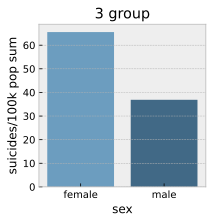

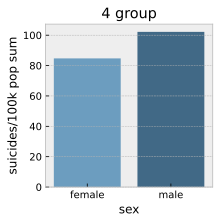

In [ ]:
#sex visualization
vusialize_groups(suicide_data, grouped_data, ['age', 'sex'], figsize=(3, 3))

#### In the first group, the suicides/100k pop is almost the same for both men and women. In the second and third groups, the value of suicides/100k pop significantly prevails among women. On the contrary, in the fourth group, the value of suicides/100k pop is higher for men.

------1 group-------
Statistic: 2.781
---15.000: 0.531, data does not look normal (reject H0)
---10.000: 0.605, data does not look normal (reject H0)
---5.000: 0.726, data does not look normal (reject H0)
---2.500: 0.847, data does not look normal (reject H0)
---1.000: 1.007, data does not look normal (reject H0)


<Figure size 288x216 with 0 Axes>

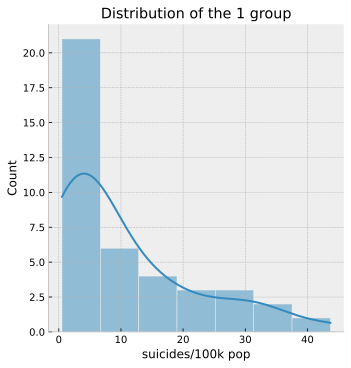

------2 group-------
Statistic: 3.556
---15.000: 0.531, data does not look normal (reject H0)
---10.000: 0.605, data does not look normal (reject H0)
---5.000: 0.726, data does not look normal (reject H0)
---2.500: 0.847, data does not look normal (reject H0)
---1.000: 1.007, data does not look normal (reject H0)


<Figure size 288x216 with 0 Axes>

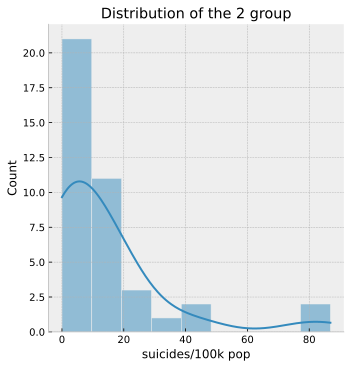

------3 group-------
Statistic: 4.284
---15.000: 0.531, data does not look normal (reject H0)
---10.000: 0.605, data does not look normal (reject H0)
---5.000: 0.726, data does not look normal (reject H0)
---2.500: 0.847, data does not look normal (reject H0)
---1.000: 1.007, data does not look normal (reject H0)


<Figure size 288x216 with 0 Axes>

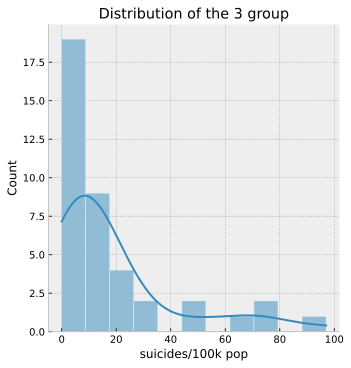

------4 group-------
Statistic: 1.337
---15.000: 0.531, data does not look normal (reject H0)
---10.000: 0.605, data does not look normal (reject H0)
---5.000: 0.726, data does not look normal (reject H0)
---2.500: 0.847, data does not look normal (reject H0)
---1.000: 1.007, data does not look normal (reject H0)


<Figure size 288x216 with 0 Axes>

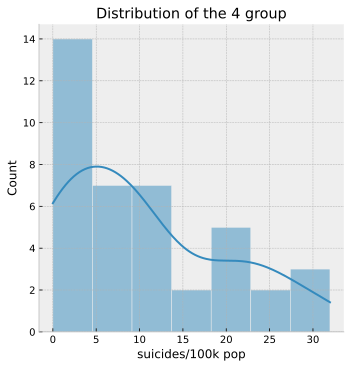

In [ ]:
# checking the normality of distribution
# Anderson-Darling Test

for name, group in grouped_data:
  print(f'------{name} group-------')
  check_normality(group['suicides/100k pop'], title=f'the {name} group')

### I conducted a normality test on each of the groups separately. None of the groups individually showed a positive result. 

### As the data doesn't have normal distribution and we have more than 2 samples to compare, I am going to use  Kruskal-Wallis H Test to check whether there is differences between all four groups.

In [ ]:
# Kruskal-Wallis H Test for 4 groups
group_1 = data_2016[data_2016['group'] == 1]['suicides/100k pop']
group_2 = data_2016[data_2016['group'] == 2]['suicides/100k pop']
group_3 = data_2016[data_2016['group'] == 3]['suicides/100k pop']
group_4 = data_2016[data_2016['group'] == 4]['suicides/100k pop']

stat, p = st.kruskal(group_1, group_2, group_3, group_4)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=3.430, p=0.330
Probably the same distribution


In [ ]:
for feature in ['sex', 'age']:
  for s in data_2016[feature].unique():
    subsample = data_2016[data_2016['sex'] == s]
    group_1 = subsample[subsample['group'] == 1]['suicides/100k pop']
    group_2 = subsample[subsample['group'] == 2]['suicides/100k pop']
    group_3 = subsample[subsample['group'] == 3]['suicides/100k pop']
    group_4 = subsample[subsample['group'] == 4]['suicides/100k pop']

    stat, p = st.kruskal(group_1, group_2, group_3, group_4)
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
      print(f'The same distribution for {s} in {feature}')
    else:
      print(f'Different distributions for {s} in {feature}')

stat=3.211, p=0.360
Probably the same distribution for male in sex
stat=2.768, p=0.429
Probably the same distribution for female in sex
stat=nan, p=nan
Probably different distributions for 75+ years in age
stat=nan, p=nan
Probably different distributions for 55-74 years in age
stat=nan, p=nan
Probably different distributions for 35-54 years in age
stat=nan, p=nan
Probably different distributions for 15-24 years in age
stat=nan, p=nan
Probably different distributions for 25-34 years in age


## Conclusion
According to the test's results, I can conclude that:
* There is no significant differences between groups of countries grouped by quantiles if the feature gdp_per_capita.
* There is no significant differences between groups of countries grouped by quantiles if the feature gdp_per_capita taking into consideration "sex" distinction.
* There is a significant differences between groups of countries grouped by quantiles if the feature gdp_per_capita taking into consideration "age" distinction.